# ***Credit EDA Case Study***

In this notebook, we will be analyzing previous_applications.csv which contains the information/data about previous applications of applicants.

**Basic Approach:**
1. Importing libraries
2. Reading Files
3. Data Cleaning for previous_application data
4. Data Analysis (Univariate/Bivariate/Multivariate analysis)
5. Summary/Conclusion

## 1. Importing Libraries

In [1]:
#Importing important Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import library to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#To view whole data clearly
pd.set_option('display.max_rows',400)
pd.set_option('display.max_columns',400)

# 2. Reading dataset (csv file)

In [2]:
df_application = pd.read_csv('application_data.csv')
df_previous = pd.read_csv('previous_application.csv')

In [3]:
#Printing head of the previous application data
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 Analyzing shape and information about previous application data

In [4]:
#Printing shape of each dataframe
print(df_application.shape)
print(df_previous.shape)

(307511, 122)
(1670214, 37)


**This tells us that:**<br>
>For application dataset -> we have 307511 rows and 122 columns.(1 target variable)<br>
>For previous dataset -> we have 1670214 rows and 37 columns

In [5]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### 2.2 Finding the common columns between 2 datasets

In [6]:
#Finding common columns
common_cols = [col for col in df_previous.columns if col in list(df_application.columns)]
common_cols

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'NAME_TYPE_SUITE']

**Observation:**
>1. There are 8 common columns between current application data and previous application data.
>2. SK_ID_CURR can be a unique identifier for both the datasets, hence we can use this column to merge the two datasets for further analysis.

## 3. Data Cleaning for previous application data (df_previous dataframe)

In [7]:
#missing_values
df_previous.isnull().sum()/df_previous.shape[0] * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

**Observation:**
1. There are 16 columns with missing values.
2. We should directly remove the columns RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED , since the missing value % is even more than 99%. So these columns are not useful for any analysis.
3. We can drop the rows for columns with missing value very less such as column AMT_CREDIT and PRODUCT_COMBINATION because the missing value % is low that it will not affect our data analysis.

### 3.1 Remomving unneccessary columns and dropping rows which will not affect our analysis.

In [8]:
#remove >99% missing value columns
#remove rows of df columns who have very less missing value.
df_previous.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1,inplace=True)
df_previous.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)
df_previous

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


#### Since columns like AMT_ANNUITY, AMT_DOWN_PAYMENT has a lot of missing values, imputing them will affect our data which we don't want so we'll leave it like that.

### 3.2 Imputing column NAME_TYPE_SUITE missing values

In [9]:
print(df_previous['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [10]:
#Number of missing values
df_previous.NAME_TYPE_SUITE.isnull().sum()/df_previous.shape[0] * 100

49.109180551505

In [11]:
# Filling missing value as 'Unknown/Missing' because around 49% of the value is missing which is huge and if we categorize as an
# existing category, it will affect our analysis.

df_previous['NAME_TYPE_SUITE'].fillna('Unknown/Missing', inplace=True)
#check value count
df_previous.NAME_TYPE_SUITE.value_counts()

Unknown/Missing    820058
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

### Since it's hard to say which imputation we should do for columns with missing % between (22-40)% , let's make a correlation matrix or heatmap to understand the correlation and relevance.

In [12]:
#Getting numeric columns
df_previous_num = df_previous[df_previous.describe().columns]
df_previous_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1669867 non-null  int64  
 1   SK_ID_CURR                 1669867 non-null  int64  
 2   AMT_ANNUITY                1297978 non-null  float64
 3   AMT_APPLICATION            1669867 non-null  float64
 4   AMT_CREDIT                 1669867 non-null  float64
 5   AMT_DOWN_PAYMENT           774370 non-null   float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   HOUR_APPR_PROCESS_START    1669867 non-null  int64  
 8   NFLAG_LAST_APPL_IN_DAY     1669867 non-null  int64  
 9   RATE_DOWN_PAYMENT          774370 non-null   float64
 10  DAYS_DECISION              1669867 non-null  int64  
 11  SELLERPLACE_AREA           1669867 non-null  int64  
 12  CNT_PAYMENT                1297983 non-null  float64
 13  DAYS_FIRST_D

In [13]:
#Removing unecessary columns
df_previous_num.drop(['SK_ID_PREV','SK_ID_CURR','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY',
                      'DAYS_DECISION','SELLERPLACE_AREA'],axis=1,inplace=True)
df_previous_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297978 non-null  float64
 1   AMT_APPLICATION            1669867 non-null  float64
 2   AMT_CREDIT                 1669867 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   CNT_PAYMENT                1297983 non-null  float64
 7   DAYS_FIRST_DRAWING         997149 non-null   float64
 8   DAYS_FIRST_DUE             997149 non-null   float64
 9   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 10  DAYS_LAST_DUE              997149 non-null   float64
 11  DAYS_TERMINATION           997149 non-null   float64
 12  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(1

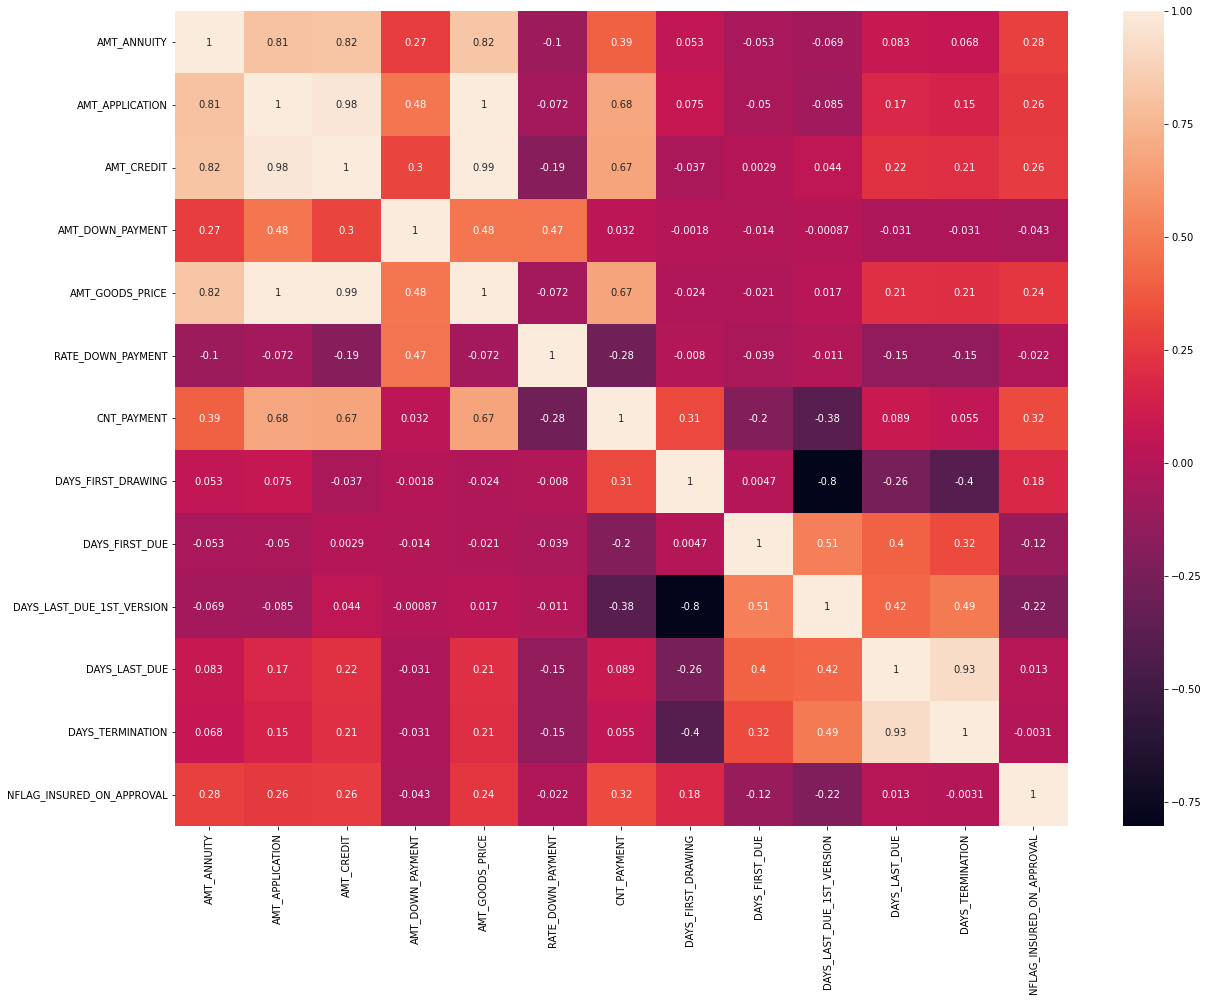

In [14]:
#Plotting heatmap using seaborn
plt.figure(figsize=(20,15))
sns.heatmap(df_previous_num.corr(),annot=True)
plt.show()

**Observations:**
>1. Columns 'AMT_CREDIT','AMT_APPLICATION','AMT_ANNUITY','AMT_GOODS_PRICE' are strongly correlated. (Close to 1)
>2. Columns 'DAYS_LAST_DUE_1ST_VERSION' and 'DAYS_FIRST_DRAWING' are in black colour (~-0.8 value close to -1). This means these are higly negatively correlated.
>3. Columns 'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly positively correlated.

>4. **These columns should be dropped** because these will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.

## 4. Merging Datasets for Data analysis
We need TARGET variable for analysis and it's in application_data.csv

In [15]:
# Merging application_data with previous_application_data on the common unique identifier SK_ID_CURR
merged_prev_df = pd.merge(df_application[['SK_ID_CURR', 'TARGET']], df_previous, how='left', on=['SK_ID_CURR'])
merged_prev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   SK_ID_PREV                   1413387 non-null  float64
 3   NAME_CONTRACT_TYPE           1413387 non-null  object 
 4   AMT_ANNUITY                  1106482 non-null  float64
 5   AMT_APPLICATION              1413387 non-null  float64
 6   AMT_CREDIT                   1413387 non-null  float64
 7   AMT_DOWN_PAYMENT             664161 non-null   float64
 8   AMT_GOODS_PRICE              1094176 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 10  HOUR_APPR_PROCESS_START      1413387 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1413387 non-n

## 5. Data Analysis (Univariate/Bivariate/Multivariate analysis)

### 5.1 Data Imbalance check

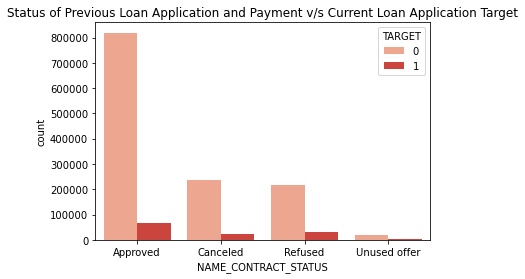

In [16]:
#checking data imbalance
plt.title("Status of Previous Loan Application and Payment v/s Current Loan Application Target")
sns.countplot(data=merged_prev_df,x='NAME_CONTRACT_STATUS', hue='TARGET',palette='Reds')
plt.show()

In [17]:
def calculate_defaulter_pct(df,col):
    temp_df = pd.DataFrame(columns=['Category','Defaulter Percentage'])
    for cat in df[col].unique():
        defaulter_count = df[(df[col]==cat) & (df['TARGET']==1)].shape[0]
        total_count = df[df[col]==cat].shape[0]
        if total_count!=0:
            temp_df = temp_df.append({'Category':cat,'Defaulter Percentage':(defaulter_count/total_count * 100)},ignore_index=True)
    return temp_df.sort_values(by='Defaulter Percentage',ascending=False)

calculate_defaulter_pct(merged_prev_df,'NAME_CONTRACT_STATUS')

,Category,Defaulter Percentage
2,Refused,11.994979
1,Canceled,9.162014
3,Unused offer,8.251724
0,Approved,7.588551


**The data is highly imbalanced,as it is clear from the plot because most of the previous loan applications are approved with around 7.58% defaulter percentage.** <br>
*One observation is that applications that were previously refused are more likely to get defaulted*

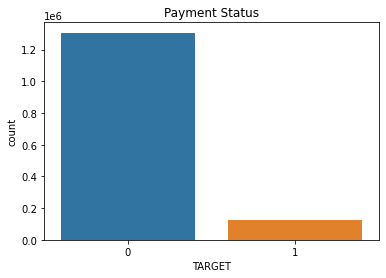

In [18]:
plt.title("Payment Status")
sns.countplot(merged_prev_df['TARGET'])
plt.show()

In [39]:
merged_prev_df.TARGET.value_counts(normalize=True)*100

0    92.385143
1     7.614857
Name: TARGET, dtype: float64

**Insights:**
>1. Clearly, we can see there is huge data imbalance between number of defaulters v/s number of non-defaulters.
>2. Percentage of non-defaulters = 92.39%
>3. Percentage of defaulters = 7.61%
>4. Data Imbalance Ratio => approx. 7.6:92.40 = 19:231

### 5.2 Numerical Analysis on merged data set

In [19]:
#describing our data
merged_prev_df.describe()

,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.429841e+06,1.429841e+06,1.413387e+06,1.106482e+06,1.413387e+06,1.413387e+06,6.641610e+05,1.094176e+06,1.413387e+06,1.413387e+06,664161.000000,1.413387e+06,1.413387e+06,1.106487e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784721e+05,8.621658e-02,1.922745e+06,1.583720e+04,1.752825e+05,1.963976e+05,6.655317e+03,2.264512e+05,1.247888e+01,9.964313e-01,0.080175,-8.804742e+02,3.150476e+02,1.605195e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028026e+05,2.806837e-01,5.327182e+05,1.472491e+04,2.936432e+05,3.195033e+05,2.062030e+04,3.159376e+05,3.331533e+00,5.963220e-02,0.107784,7.835932e+02,7.695935e+03,1.456674e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893620e+05,0.000000e+00,1.461345e+06,6.257880e+03,1.975500e+04,2.491200e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,-1.314000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789590e+05,0.000000e+00,1.922706e+06,1.122376e+04,7.090200e+04,8.064000e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675110e+05,0.000000e+00,2.384020e+06,2.042111e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### 5.2.1 Plotting AMT_ANNUITY, AMT_DOWN_PAYMENT

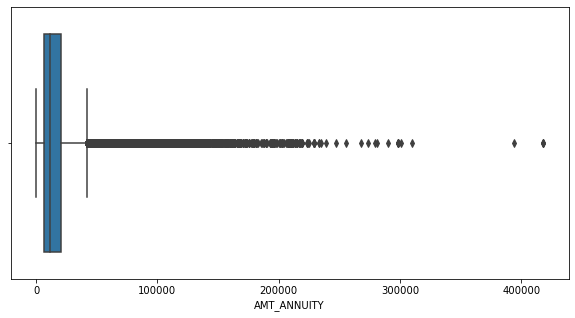

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_prev_df,x='AMT_ANNUITY')
plt.show()

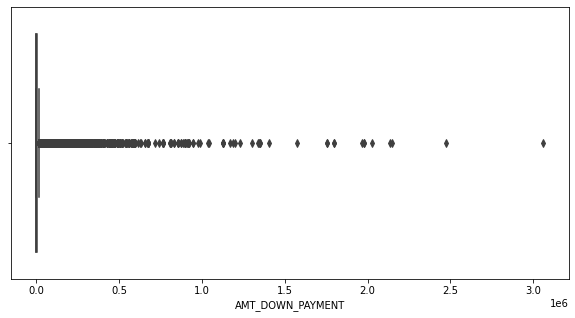

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(merged_prev_df['AMT_DOWN_PAYMENT'])
plt.show()

>Clearly there are outliers so we need to find out quantiles and then cap/exclude outliers.

In [22]:
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT
merged_prev_df = merged_prev_df[merged_prev_df['AMT_ANNUITY'] < np.nanpercentile(merged_prev_df['AMT_ANNUITY'], 99)]
merged_prev_df = merged_prev_df[merged_prev_df['AMT_DOWN_PAYMENT'] < np.nanpercentile(merged_prev_df['AMT_DOWN_PAYMENT'], 99)]

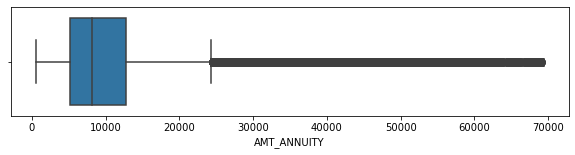

In [23]:
plt.figure(figsize=(10,2))
sns.boxplot(merged_prev_df['AMT_ANNUITY'])
plt.show()

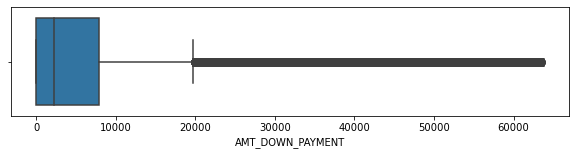

In [24]:
plt.figure(figsize=(10,2))
sns.boxplot(merged_prev_df['AMT_DOWN_PAYMENT'])
plt.show()

### Analysing NAME_CONTRACT_TYPE column with NAME_CONTRACT_STATUS

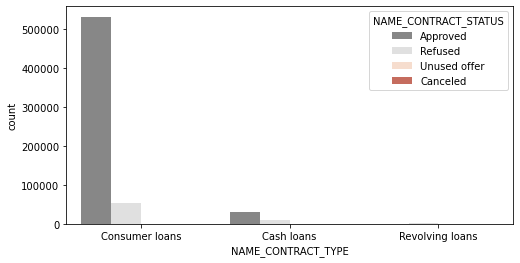

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(data=merged_prev_df,x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',palette='RdGy_r')
plt.show()

### Analysing the relation between previous and new applications/applicants

In [26]:
calculate_defaulter_pct(merged_prev_df,'NAME_CONTRACT_STATUS')

,Category,Defaulter Percentage
3,Canceled,11.764706
2,Unused offer,10.485934
1,Refused,9.817162
0,Approved,7.354524


**Observations:**
>1. % of previously Approved applicants who defaulted in current/new loan : 7.35%
>2. % of previously Refused applicants who were able to pay/repayer : approx 90%
>3. % of previously Cancelled applications who were now able to pay : approx 88%.

In [27]:
merged_prev_df.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818.0,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown/Missing,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,100003,0,2636178.0,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,2396755.0,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15.0,Y,1.0,0.100061,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,1564014.0,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5.0,Y,1.0,0.212008,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
11,100006,0,2299329.0,Consumer loans,2482.920,26912.34,24219.0,2693.34,26912.34,TUESDAY,15.0,Y,1.0,0.108994,XAP,Approved,-617.0,XNA,XAP,Unknown/Missing,New,Construction Materials,POS,XNA,Stone,30.0,Construction,12.0,middle,POS industry with interest,365243.0,-545.0,-215.0,-425.0,-416.0,0.0


### Relevance of Starting process on weekday for previous application

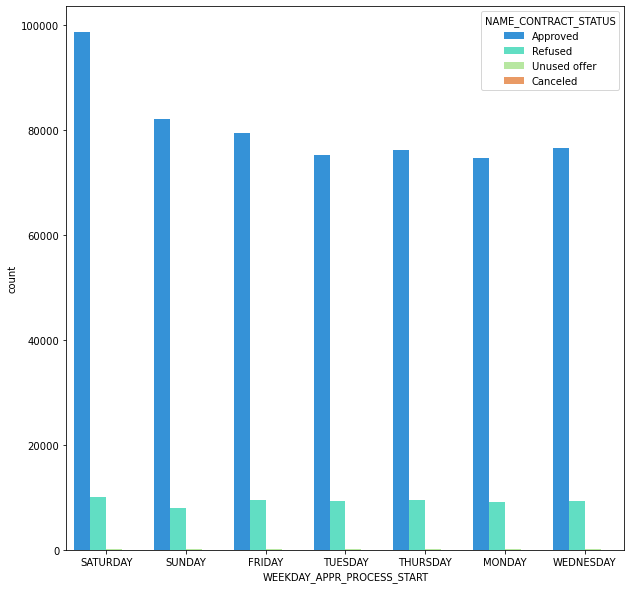

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(data=merged_prev_df,x='WEEKDAY_APPR_PROCESS_START',hue='NAME_CONTRACT_STATUS',palette='rainbow')
plt.show()

**Observation**:
>Application process that started on Saturday got approved the most.

### Analyzing NAME_CASH_LOAN_PURPOSE for previous application

In [29]:
merged_prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 587657
XNA                                  34372
Other                                 2153
Repairs                               1591
Everyday expenses                      783
Education                              454
Medicine                               405
Purchase of electronic equipment       242
Journey                                227
Buying a used car                      219
Buying a new car                        43
Payments on other loans                 39
Money for a third person                 6
Hobby                                    2
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

*The values except XAP and XNA are very low, so we can combine all of them into 'Other'*

In [30]:
def update_cash_loan_purpose(val):
    if not (val == "XAP" or val== "XNA"):
        val = 'Other'
    return val
merged_prev_df.NAME_CASH_LOAN_PURPOSE = merged_prev_df.NAME_CASH_LOAN_PURPOSE.apply(update_cash_loan_purpose)

In [31]:
merged_prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP      587657
XNA       34372
Other      6164
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

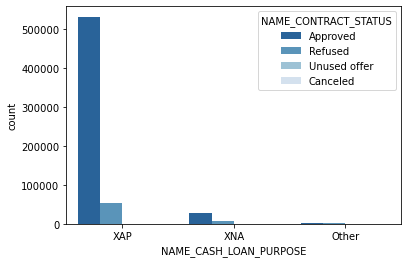

In [32]:
sns.countplot(data=merged_prev_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',palette='Blues_r')
plt.show()

**Observation:**
>1. Most of the applicants cash loan purpose ='XAP' got approved in the previous applications.
>2. Other than XAP and XNA, rest all values are negligible.

### Plotting AMT_ANNUITY v/s AMT_DOWN_PAYMENT for defaulters and non-defaulters

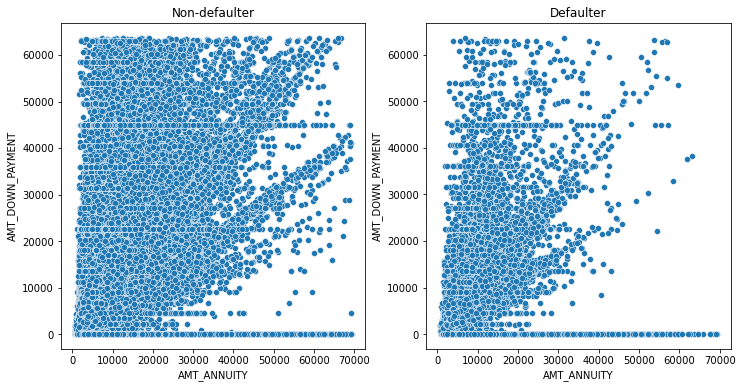

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.set_title('Non-defaulter')
ax2.set_title('Defaulter')

sns.scatterplot(merged_prev_df[merged_prev_df["TARGET"] == 0]['AMT_ANNUITY'], merged_prev_df[merged_prev_df["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(merged_prev_df[merged_prev_df["TARGET"] == 1]['AMT_ANNUITY'], merged_prev_df[merged_prev_df["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()

Number of defaulters are less for larger amount of annuity of previous application. <br>
For higher down payment, defaulter cases are less.

### Analyzing Reject Reasons from previous application and default or not , for current application.

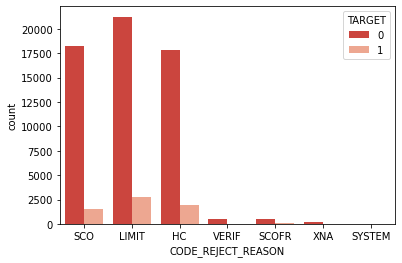

In [34]:
sns.countplot(merged_prev_df[merged_prev_df['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"],
              hue=merged_prev_df.TARGET,palette='Reds_r')
plt.show()

>Three reasons, 'SCO','LIMIT','HC' are the reasons of rejection in previous application, but are now most likely non-defaulters.

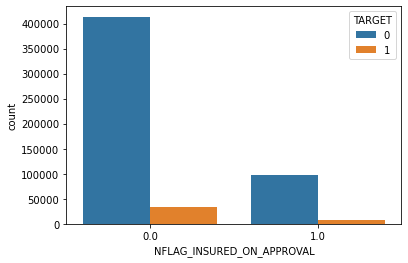

In [35]:
sns.countplot(merged_prev_df['NFLAG_INSURED_ON_APPROVAL'], hue=merged_prev_df['TARGET'])
plt.show()

>Most of the people did not request insurance during previous loan application.

In [36]:
calculate_defaulter_pct(merged_prev_df, 'NAME_PORTFOLIO')

,Category,Defaulter Percentage
2,Cards,17.119695
0,POS,7.666139
1,Cash,6.384448
3,Cars,0.000000


>For Cards defaulter rate is highest.

In [37]:
calculate_defaulter_pct(merged_prev_df, 'PRODUCT_COMBINATION')

,Category,Defaulter Percentage
13,Card Street,17.195005
4,POS mobile with interest,8.761056
0,POS other with interest,7.953141
3,POS mobile without interest,7.888514
2,POS household with interest,7.752151
11,POS others without interest,7.256127
15,Card X-Sell,6.666667
5,POS household without interest,6.649376
9,Cash Street: middle,6.475391
10,Cash Street: high,6.417625


>Category 'Card Street' is more likely to be defaulter(17.19%) than other categories.

# Conclusion:

1. There are feature columns in the dataset that are highly correlated to each other. Which means both will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.

2. Feature columns with 50% or more missing data can be dropped.

3. This dataset is highly imbalanced

4. The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected. NAME_CONTRACT_STATUS is an important feature.

5. 7% of the previously approved loan applicants defaulted in current loan
6. 90 % of the previously refused loan applicants were able to pay current loan
7. 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection.

8. Most of the people did not request insurance during previous loan application.

9. For "Cards" defaulter percentage is highest (17%). 'NAME_PORTFOLIO' is an important feature for analyzing 'TARGET' variable.

10. Highest percentage (17%) of default cases is for 'Card Street'. 'PRODUCT_COMBINATION' is an important driving factor.